# Classifying Songs with EchoNest

In [2]:
#importing the basic libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#reading files

tracks = pd.read_csv('data/fma-rock-vs-hiphop.csv')
echonest_metrics = pd.read_json('data/echonest-metrics.json', precise_float=True)
tracks.head()


,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [4]:
echonest_metrics.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
10,145,0.235506,0.438672,0.487752,0.716122,0.070359,0.047298,120.790,0.650452
100,341,0.977282,0.468808,0.134975,0.687700,0.105381,0.073124,119.646,0.430707
1000,3457,0.081256,0.897197,0.367886,0.104474,0.085845,0.041271,100.744,0.749293


In [5]:
# merging both dataframes into one.
echo_tracks = pd.merge(left = tracks[['track_id', 'genre_top']], right=echonest_metrics, on='track_id')

echo_tracks.head()

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,Rock,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,154,Rock,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,155,Rock,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,169,Rock,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,170,Rock,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548


In [6]:
echo_tracks.describe()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,4802.000000,4.802000e+03,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000
mean,30164.871720,4.870600e-01,0.436556,0.625126,0.604096,0.187997,0.104877,126.687944,0.453413
std,28592.013796,3.681396e-01,0.183502,0.244051,0.376487,0.150562,0.145934,34.002473,0.266632
min,2.000000,9.491000e-07,0.051307,0.000279,0.000000,0.025297,0.023234,29.093000,0.014392
25%,7494.250000,8.351236e-02,0.296047,0.450757,0.164972,0.104052,0.036897,98.000750,0.224617
50%,20723.500000,5.156888e-01,0.419447,0.648374,0.808752,0.123080,0.049594,124.625500,0.446240
75%,44240.750000,8.555765e-01,0.565339,0.837016,0.915472,0.215151,0.088290,151.450000,0.666914
max,124722.000000,9.957965e-01,0.961871,0.999768,0.993134,0.971392,0.966177,250.059000,0.983649


In [7]:
echo_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
track_id            4802 non-null int64
genre_top           4802 non-null object
acousticness        4802 non-null float64
danceability        4802 non-null float64
energy              4802 non-null float64
instrumentalness    4802 non-null float64
liveness            4802 non-null float64
speechiness         4802 non-null float64
tempo               4802 non-null float64
valence             4802 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


#### The data is prepared and we can notice that there is no missing/null values present.
###  Now let us try to find if there is any significant value for correlation between our data.

In [8]:
#finding correlation

echo_corr = echo_tracks.corr()
echo_corr

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


### Normalize

In [9]:
# X
feat = echo_tracks.drop(['track_id', 'genre_top'], axis=1)

In [10]:
# y
labels = echo_tracks['genre_top']

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
scaled_feat = scaler.fit_transform(feat)

### Principal Component Analysis

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA()

In [16]:
pca.fit(scaled_feat)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
ex_var = pca.explained_variance_ratio_
ex_var

array([0.24297674, 0.18044316, 0.13650309, 0.12994089, 0.11056248,
       0.08302245, 0.06923783, 0.04731336])

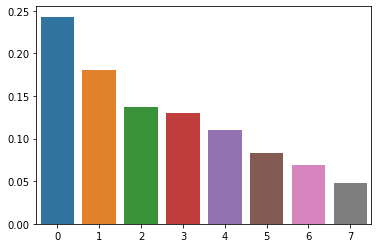

In [18]:
#plotting
rng = np.arange(0,pca.n_components_) 
sns.barplot(x=rng, y=ex_var)

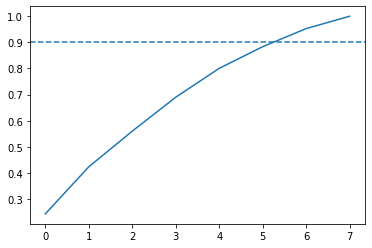

In [19]:
cum_exp_variance = np.cumsum(ex_var)
cum_exp_variance

fig, ax = plt.subplots()
ax.plot(range(8),cum_exp_variance)
ax.axhline(y=0.9, linestyle='--')
plt.show()



In [20]:
n_components = 7

# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components, random_state=10)
pca.fit(scaled_feat)
pca_projection = pca.transform(scaled_feat)

### Decison tree

#### Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = pca_projection
y= labels

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Fitting the Model

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
Treemodel = DecisionTreeClassifier(random_state=10)

In [26]:
Treemodel.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

#### Getting Predictions

In [27]:
pred = Treemodel.predict(X_test)

In [28]:
pred

array(['Rock', 'Rock', 'Rock', ..., 'Rock', 'Rock', 'Rock'], dtype=object)

#### Evaluating the Model

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[ 173   97]
 [  86 1085]]


              precision    recall  f1-score   support

     Hip-Hop       0.67      0.64      0.65       270
        Rock       0.92      0.93      0.92      1171

    accuracy                           0.87      1441
   macro avg       0.79      0.78      0.79      1441
weighted avg       0.87      0.87      0.87      1441



In [31]:
labels.value_counts()

Rock       3892
Hip-Hop     910
Name: genre_top, dtype: int64

The DataSet is not balanced, hence we did not get good results.

### Logistic Regression

#### Importing and fitting model

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
Lmodel = LogisticRegression(random_state=10)

In [34]:
Lmodel.fit(X_train, y_train)

C:\Users\jains\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=10, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Getting predictions and evaluating model

In [35]:
l_pred = Lmodel.predict(X_test)

In [36]:
print(confusion_matrix(y_test, l_pred))
print('\n')
print(classification_report(y_test, l_pred))

[[ 147  123]
 [  35 1136]]


              precision    recall  f1-score   support

     Hip-Hop       0.81      0.54      0.65       270
        Rock       0.90      0.97      0.93      1171

    accuracy                           0.89      1441
   macro avg       0.85      0.76      0.79      1441
weighted avg       0.88      0.89      0.88      1441



### Balancing The Model

In [37]:
hop_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Hip-Hop']
rock_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Rock']

In [38]:
rock_only = rock_only.sample(n = hop_only.shape[0])

In [39]:
rock_only.shape, hop_only.shape

((910, 10), (910, 10))

In [40]:
balanced_echo = pd.concat([rock_only, hop_only])

In [41]:
balanced_echo.shape

(1820, 10)

In [42]:
pca_projection = pca.fit_transform(scaler.fit_transform(balanced_echo.drop(['track_id', 'genre_top'], axis=1)))

In [43]:
X = pca_projection
y= balanced_echo['genre_top']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Now Evaluating Perfomance

In [45]:
Tmodel = DecisionTreeClassifier(random_state=10)
Tmodel.fit(X_train, y_train)
tpred = Tmodel.predict(X_test)

Lmodel = LogisticRegression(random_state=10)
Lmodel.fit(X_train, y_train)
lpred = Lmodel.predict(X_test)

print('The Decison Tree \n')
print(confusion_matrix(y_test, tpred))
print('\n')
print(classification_report(y_test, tpred))
print('\n')
print('The Logistic Regression \n')
print(confusion_matrix(y_test, lpred))
print('\n')
print(classification_report(y_test, lpred))

The Decison Tree 

[[216  51]
 [ 60 219]]


              precision    recall  f1-score   support

     Hip-Hop       0.78      0.81      0.80       267
        Rock       0.81      0.78      0.80       279

    accuracy                           0.80       546
   macro avg       0.80      0.80      0.80       546
weighted avg       0.80      0.80      0.80       546



The Logistic Regression 

[[229  38]
 [ 41 238]]


              precision    recall  f1-score   support

     Hip-Hop       0.85      0.86      0.85       267
        Rock       0.86      0.85      0.86       279

    accuracy                           0.86       546
   macro avg       0.86      0.86      0.86       546
weighted avg       0.86      0.86      0.86       546



C:\Users\jains\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Using Cross-Validation For Evaluation

In [46]:
from sklearn.model_selection import KFold, cross_val_score

In [47]:
kf = KFold(n_splits=10, random_state=10)

In [48]:
tmodel = DecisionTreeClassifier(random_state=10)
lmodel = LogisticRegression(random_state=10)

In [49]:
tree_score = cross_val_score(tmodel,X,y,cv=kf)
logit_score = cross_val_score(lmodel, X,y,cv=kf)

C:\Users\jains\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jains\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jains\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jains\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jains\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [50]:
print("Decison Tree:",np.mean(tree_score))
print('\n')
print("Logistic Model:", np.mean(logit_score))

Decison Tree: 0.760989010989011


Logistic Model: 0.8186813186813187


### The end!